# Plotting

The `plotting` module contains a few classes you can use to quickly generate plots of an experiment, as well as plot data live during the experiment. In this example, we will assume that you are familiar with the workings of the `ShieldController` class. If not, check this [example](./controller.ipynb). 

The `Plotter` and `LivePlotter` can be imported from the `plotting` module

In [1]:
%%capture

from automationshield import AeroShield, ShieldController
from automationshield.plotting import Plotter, LivePlotter

We're reusing the PID controller of the `ShieldController` example, shown again below.

In [3]:
class PIDController(ShieldController):
    def variables(self) -> None:
        # preface every variable defined in subclass with var_ to avoid overwrites.
        self.var_kp = 1
        self.var_ki = .25
        self.var_kd = .25

        self.var_total_error = 0
        self.var_prev_error = 0

    def controller(self, t: float, dt: float, ref: float, pot: float, angle: float) -> float:
        error = ref - angle
        self.var_total_error += error * dt

        proportional = self.var_kp * error
        integral = self.var_kp/self.var_ki * self.var_total_error

        if dt > 0:
            differential = self.var_kp*self.var_kd*(error - self.var_prev_error)/dt
        else:
            differential = 0

        motor = proportional + integral + differential

        self.var_prev_error = error

        return motor

Here, we create a shield and controller instance and define the frequency, cycles and reference we will use for an experiment.

In [4]:
shield = AeroShield()
pid_controller = PIDController(shield)

freq = 200
cycles = 1000
ref = 45

## `LivePlotter`

Because this tutorial is written in Jupyter, we need to jump through some hoops to make this work smoothly. A live plot must be placed in a separate window. We achieve this by using the magic command. After the magic command, we should import matplotlib again to change the backend.

We then create an instance of the `LivePlotter` class. There are several customisation options, some of which are used here. In a Jupyter environment, `hold` must always be set to `False` (the default), otherwise the plot window will stop responding and cause the kernel to crash. Please refer to the API Documentation for a complete list of options. 

The `run` method of the controller takes an optional `live_plotter` keyword argument. Passing a LivePlotter instance to it is all that is needed to get a live plot as the experiment is running.

In [5]:
# set matplotlib to use separate plotting window
%matplotlib
# we call the magic command twice because the internet says so. ¯\_(ツ)_/¯
%matplotlib

# we need to import matplotlib again after the magic command
from matplotlib import pyplot as plt


live_plotter = LivePlotter(shield, show_dt=True, show_pot=False, hold=False)
results = pid_controller.run(freq, cycles, ref, live_plotter=live_plotter)

Using matplotlib backend: <object object at 0x00000186EE7442C0>
Using matplotlib backend: QtAgg


## `Plotter`

If you just (or also) want a plot with the results of the experiment when it's finished, you can use the `Plotter` class. In Jupyter, we can change the matplotlib to inline such that the plot is shown below the code block. The `Plotter` takes the same arguments as `LivePlotter` (which actually inherits from `Plotter`), except the `hold` argument.

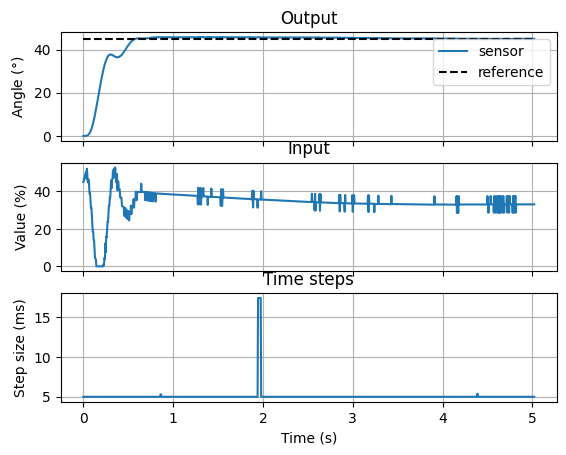

In [6]:
# set matplotlib to use inline plotting
%matplotlib inline
%matplotlib inline

# we need to import matplotlib again after the magic command
from matplotlib import pyplot as plt


# results = pid_controller.run(freq, cycles, ref)
fig, ax = Plotter(shield).plot(results)

## Selecting an Appropriate Backend

It is possible that, when attempting to plot live from a Jupyter environment, matplotlib complains about not having an appropriate backend available or that the plotting runs extremely slow. If that is the case, you can try to force matplotlib to use PyQT5, which you might have to install as well.

In [ ]:
import matplotlib


# tell matplotlib to use PyQT5
matplotlib.use("QT5Agg")

You can install PyQT5 in your Python environment using pip:

`$ pip install PyQT5`